<h2> 602 Final Project </h2>

<b>Project and Dataset:</b> This project is using the dataset given in Kaggle.com. Here we will try to perform regression on this dataset and try to predict the Saleprice of that particular house. Once we complete it, uses <a href="https://www.youtube.com/channel/UCz2-0uvBJt-AwoiFSyMb_yQ"> amazon echo(alexa)</a> to get input via voice and say the predicted output of the house. <a>https://www.kaggle.com/c/house-prices-advanced-regression-techniques</a> 


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from math import sqrt

Training and Test dataset is provided in the link.

In [69]:
df = pd.read_csv("data\\train.csv")
df
test_df = pd.read_csv("data\\test.csv")
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
#Total number of NA's in each column
df_num_na = df.select_dtypes(['number'])
df_num_na.apply(lambda x:x.isnull().sum().sum())

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [48]:
#Perform median impuatation to all the missing values values
df_num = df_num_na.apply(lambda x:x.fillna(x.median()))
df_num.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Most of the data is skewed. Lets compare each exploratory variable with the predicted variable

In [70]:
#OverallQual,OverallQual,YearBuilt,YearRemodAdd,YrSold

df_num_clean = df_num[['MSSubClass' , 'OverallQual','OverallQual','YearBuilt','YearRemodAdd','YrSold','LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch' ,'3SsnPorch','ScreenPorch','PoolArea', 'MiscVal',  'MoSold','SalePrice']]
df_num_clean

MSSubClass  OverallQual  OverallQual  YearBuilt  YearRemodAdd  YrSold  \
0             60            7            7       2003          2003    2008   
1             20            6            6       1976          1976    2007   
2             60            7            7       2001          2002    2008   
3             70            7            7       1915          1970    2006   
4             60            8            8       2000          2000    2008   
5             50            5            5       1993          1995    2009   
6             20            8            8       2004          2005    2007   
7             60            7            7       1973          1973    2009   
8             50            7            7       1931          1950    2008   
9            190            5            5       1939          1950    2008   
10            20            5            5       1965          1965    2008   
11            60            9            9       2005          2006    2006   
12            20            5            5       1962          1962    2008   
13            20            7            7       2006          2007    2007   
14            20            6            6       1960          1960    2008   
15            45            7            7       1929          2001    2007   
16            20            6            6       1970          1970    2010   
17            90            4            4       1967          1967    2006   
18            20            5            5       2004          2004    2008   
19            20            5            5       1958          1965    2009   
20            60            8            8       2005          2006    2006   
21            45            7            7       1930          1950    2007   
22            20            8            8       2002          2002    2008   
23           120            5            5       1976          1976    2007   
24            20            5            5       1968          2001    2010   
25            20            8            8       2007          2007    2009   
26            20            5            5       1951          2000    2010   
27            20            8            8       2007          2008    2010   
28            20            5            5       1957          1997    2006   
29            30            4            4       1927          1950    2008   
...          ...          ...          ...        ...           ...     ...   
1430          60            5            5       2005          2005    2006   
1431         120            6            6       1976          1976    2009   
1432          30            4            4       1927          2007    2007   
1433          60            6            6       2000          2000    2008   
1434          20            5            5       1977          1977    2006   
1435          20            6            6       1962          2005    2008   
1436          20            4            4       1971          1971    2007   
1437          20            8            8       2008          2008    2008   
1438          20            6            6       1957          1996    2010   
1439          60            7            7       1979          1979    2007   
1440          70            6            6       1922          1994    2008   
1441         120            6            6       2004          2004    2008   
1442          60           10           10       2008          2008    2009   
1443          30            6            6       1916          1950    2009   
1444          20            7            7       2004          2004    2007   
1445          85            6            6       1966          1966    2007   
1446          20            5            5       1962          1962    2010   
1447          60            8            8       1995          1996    2007   
1448          50            4            4       1910   

In [71]:
df_num_clean_log = df_num_clean.apply(lambda x: np.log1p(x))
df_num_clean_log

MSSubClass  OverallQual  OverallQual  YearBuilt  YearRemodAdd    YrSold  \
0       4.110874     2.079442     2.079442   7.602900      7.602900  7.605392   
1       3.044522     1.945910     1.945910   7.589336      7.589336  7.604894   
2       4.110874     2.079442     2.079442   7.601902      7.602401  7.605392   
3       4.262680     2.079442     2.079442   7.557995      7.586296  7.604396   
4       4.110874     2.197225     2.197225   7.601402      7.601402  7.605392   
5       3.931826     1.791759     1.791759   7.597898      7.598900  7.605890   
6       3.044522     2.197225     2.197225   7.603399      7.603898  7.604894   
7       4.110874     2.079442     2.079442   7.587817      7.587817  7.605890   
8       3.931826     2.079442     2.079442   7.566311      7.576097  7.605392   
9       5.252273     1.791759     1.791759   7.570443      7.576097  7.605392   
10      3.044522     1.791759     1.791759   7.583756      7.583756  7.605392   
11      4.110874     2.302585     2.302585   7.603898      7.604396  7.604396   
12      3.044522     1.791759     1.791759   7.582229      7.582229  7.605392   
13      3.044522     2.079442     2.079442   7.604396      7.604894  7.604894   
14      3.044522     1.945910     1.945910   7.581210      7.581210  7.605392   
15      3.828641     2.079442     2.079442   7.565275      7.601902  7.604894   
16      3.044522     1.945910     1.945910   7.586296      7.586296  7.606387   
17      4.510860     1.609438     1.609438   7.584773      7.584773  7.604396   
18      3.044522     1.791759     1.791759   7.603399      7.603399  7.605392   
19      3.044522     1.791759     1.791759   7.580189      7.583756  7.605890   
20      4.110874     2.197225     2.197225   7.603898      7.604396  7.604396   
21      3.828641     2.079442     2.079442   7.565793      7.576097  7.604894   
22      3.044522     2.197225     2.197225   7.602401      7.602401  7.605392   
23      4.795791     1.791759     1.791759   7.589336      7.589336  7.604894   
24      3.044522     1.791759     1.791759   7.585281      7.601902  7.606387   
25      3.044522     2.197225     2.197225   7.604894      7.604894  7.605890   
26      3.044522     1.791759     1.791759   7.576610      7.601402  7.606387   
27      3.044522     2.197225     2.197225   7.604894      7.605392  7.606387   
28      3.044522     1.791759     1.791759   7.579679      7.599902  7.604396   
29      3.433987     1.609438     1.609438   7.564238      7.576097  7.605392   
...          ...          ...          ...        ...           ...       ...   
1430    4.110874     1.791759     1.791759   7.603898      7.603898  7.604396   
1431    4.795791     1.945910     1.945910   7.589336      7.589336  7.605890   
1432    3.433987     1.609438     1.609438   7.564238      7.604894  7.604894   
1433    4.110874     1.945910     1.945910   7.601402      7.601402  7.605392   
1434    3.044522     1.791759     1.791759   7.589842      7.589842  7.604396   
1435    3.044522     1.945910     1.945910   7.582229      7.603898  7.605392   
1436    3.044522     1.609438     1.609438   7.586804      7.586804  7.604894   
1437    3.044522     2.197225     2.197225   7.605392      7.605392  7.605392   
1438    3.044522     1.945910     1.945910   7.579679      7.599401  7.606387   
1439    4.110874     2.079442     2.079442   7.590852      7.590852  7.604894   
1440    4.262680     1.945910     1.945910   7.561642      7.598399  7.605392   
1441    4.795791     1.945910     1.945910   7.603399      7.603399  7.605392   
1442    4.110874     2.397895     2.397895   7.605392      7.605392  7.605890   
1443    3.433987     1.945910     1.945910   7.558517      7.576097  7.605890   
1444    3.044522     2.079442     2.079442   7.603399      7.603399  7.604894   
1445    4.454347     1.945910     1.945910   7.584265      7.584265  7.604894   
1446    3.044522     1.791759     1.791759   7.582229      7.582229  7.606387   
1447    4.110874     2.197225     2.1

In [72]:
msk = np.random.rand(len(df_num_clean_log)) <.8
msk
train_X = df_num_clean_log.loc[:,'MSSubClass':'MoSold'][msk]
train_Y = pd.DataFrame(df_num_clean_log.loc[:,'SalePrice'][msk])

#Test
test_X = df_num_clean_log.loc[:,'MSSubClass':'MoSold'][~msk]
test_Y = pd.DataFrame(df_num_clean_log.loc[:,'SalePrice'][~msk])

print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))


1181
1181
279
279


In [73]:
rf_param = ensemble.RandomForestRegressor()
cols = list(train_X.columns.values)

model_rf = rf_param.fit(train_X[cols],train_Y.SalePrice)

r2 = sk.metrics.r2_score(test_Y.SalePrice, model_rf.predict(test_X[cols]))

mse = np.mean((test_Y.SalePrice - model_rf.predict(test_X[cols]))**2)
rmse = sqrt(np.mean((test_Y.SalePrice - model_rf.predict(test_X[cols]))**2))

np.exp(mse)
print(r2)
print(mse)
print(rmse)


0.814177153834
0.026278918389623894
0.16210773698261258


In [56]:
test_df_num = test_df.select_dtypes(['number'])
test_df_all = test_df_num.apply(lambda x:x.fillna(x.median()))
test_df_all_log = test_df_all.apply(lambda x: np.log1p(x))
test_df_all_log

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
0     7.287561    3.044522     4.394449   9.360741     1.791759     1.945910   
1     7.288244    3.044522     4.406719   9.565775     1.945910     1.945910   
2     7.288928    4.110874     4.317488   9.534668     1.791759     1.791759   
3     7.289611    4.110874     4.369448   9.208238     1.945910     1.945910   
4     7.290293    4.795791     3.784190   8.518392     2.197225     1.791759   
5     7.290975    4.110874     4.330733   9.210440     1.945910     1.791759   
6     7.291656    3.044522     4.219508   8.984819     1.945910     2.079442   
7     7.292337    4.110874     4.158883   9.036344     1.945910     1.791759   
8     7.293018    3.044522     4.454347   9.227886     2.079442     1.791759   
9     7.293698    3.044522     4.262680   9.036106     1.609438     1.791759   
10    7.294377    4.795791     3.295837   8.675734     2.079442     1.791759   
11    7.295056    5.081404     3.091042   7.427144     1.945910     1.791759   
12    7.295735    5.081404     3.091042   7.427144     1.791759     1.791759   
13    7.296413    5.081404     3.218876   7.732369     1.945910     1.945910   
14    7.297091    4.795791     3.218876   7.732369     2.079442     1.945910   
15    7.297768    4.110874     4.634729   9.461799     2.302585     1.791759   
16    7.298445    3.044522     4.553877   9.463742     2.197225     1.791759   
17    7.299121    3.044522     4.510860   9.351927     2.302585     1.791759   
18    7.299797    3.044522     4.382027   9.555560     2.197225     1.791759   
19    7.300473    3.044522     4.709530   9.568085     2.302585     1.791759   
20    7.301148    4.110874     4.663439   9.521568     2.197225     1.791759   
21    7.301822    4.795791     3.737670   8.872487     2.197225     1.791759   
22    7.302496    3.044522     4.615121   9.825256     1.945910     1.791759   
23    7.303170    4.795791     3.784190   8.072155     2.079442     1.791759   
24    7.303843    4.394449     4.219508   9.495594     2.079442     1.791759   
25    7.304516    4.110874     4.158883   9.056956     2.079442     1.791759   
26    7.305188    4.110874     4.110874   9.766178     2.197225     1.791759   
27    7.305860    3.044522     4.304065   9.103646     2.197225     1.791759   
28    7.306531    3.044522     4.532599   9.128696     2.079442     1.791759   
29    7.307202    3.044522     4.442651   9.253496     1.945910     1.791759   
...        ...         ...          ...        ...          ...          ...   
1429  7.969358    3.433987     3.931826   8.858084     1.609438     1.945910   
1430  7.969704    3.931826     4.330733   9.111735     1.945910     1.791759   
1431  7.970049    3.433987     4.248495   9.422787     1.386294     1.791759   
1432  7.970395    5.252273     3.931826   9.105091     1.791759     1.945910   
1433  7.970740    3.931826     4.110874   9.050289     1.386294     1.791759   
1434  7.971086    4.795791     3.737670   8.656781     2.197225     1.791759   
1435  7.971431    4.795791     3.806662   8.254009     2.197225     1.791759   
1436  7.971776    3.044522     4.248495  10.068197     1.945910     1.945910   
1437  7.972121    4.510860     4.189655   9.034319     1.945910     1.791759   
1438  7.972466    3.044522     4.262680   9.117896     2.197225     1.791759   
1439  7.972811    4.394449     4.948760   9.312987     1.945910     1.945910   
1440  7.973155    3.044522     4.219508  10.821836     1.945910     1.791759   
1441  7.973500    3.044522     4.219508   8.999496     1.945910     1.791759   
1442  7.973844    3.044522     4.564348   9.519221     2.197225     1.791759   
1443  7.974189    3.044522     4.488636   9.356862     2.302585     1.791759   
1444  7.974533    3.044522     4.836282  10.349807     0.693147     1.386294   
1445  7.974877    4.510860     4.369448   8.856661     2.079442     1.791759   
1446  7.975221    5.081404     3.737670   7.888335     1.791759     1.945910   
1447  7.9755

In [60]:
output_test_df = test_df
output_test_df['Predicted_SP'] = np.exp(model_rf.predict(test_df_all_log[cols]))
output_test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  2890          30       RM         50.0     7030   Pave   NaN      Reg   
1430  2891          50       RM         75.0     9060   Pave   NaN      Reg   
1431  2892          30  C (all)         69.0    12366   Pave   NaN      Reg   
1432  2893         190  C (all)         50.0     9000   Pave   NaN      Reg   
1433  2894          50  C (all)         60.0     8520   Grvl   NaN      Reg   
1434  2895         120       RM         41.0     5748   Pave   NaN      IR1   
1435  2896         120       RM         44.0     3842   Pave   NaN      IR1   
1436  2897          20       RL         69.0    23580   Pave   NaN      IR1   
1437  2898          90       RL         65.0     8385   Pave   NaN      Reg   
1438  2899          20       RL         70.0     9116   Pave   NaN      Reg   
1439  2900          80       RL        140.0    11080   Pave   NaN      Reg   
1440  2901          20       RL          NaN    50102   Pave   NaN      IR1   
1441  2902          20       RL          NaN     8098   Pave   NaN      IR1   
1442  2903          20       RL         95.0    13618   Pave   NaN      Reg   
1443  2904          20       RL         88.0    11577   Pave   NaN      Reg   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   
1445  2906          90       RM         78.0     7020   Pave   NaN      Reg   
1446  2907         160       RM         41.0     2665   Pave   NaN      Reg   
1447  2908          20       RL         58.0    10172   Pa

Above shown is the final output of the random forest regression analysis. Now lets include the categorical variable and predict the house price.

In [6]:
#New regression including random forest

df_all = pd.get_dummies(df)

df_all_X = df_all.loc[:,'MSSubClass':'SaleCondition_Partial']
df_Y = pd.DataFrame(df_all.SalePrice)
df_all_X

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60          NaN    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20          NaN    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20          NaN    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20          NaN    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20          NaN     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
...          ...          ...      ...          ...          ...        ...   
1430          60         60.0    21930            5            5       2005   
1431         120          NaN     4928            6            6       1976   
1432          30         60.0    10800            4            6       1927   
1433          60         93.0    10261            6            5       2000   
1434          20         80.0    17400            5            5       1977   
1435          20         80.0     8400            6            9       1962   
1436          20         60.0     9000            4            6       1971   
1437          20         96.0    12444            8            5       2008   
1438          20         90.0     7407            6            7       1957   
1439          60         80.0    11584            7            6       1979   
1440          70         79.0    11526            6            7       1922   
1441         120          NaN     4426            6            5       2004   
1442          60         85.0    11003           10            5       2008   
1443          30          NaN     8854            6            6       1916   
1444          20         63.0     8500            7            5       2004   
1445          85         70.0     8400            6            5       1966   
1446          20          NaN    26142            5            7       1962   
1447          60         80.0    10000            8            5       1995   
1448          50         70.0    11767            4     

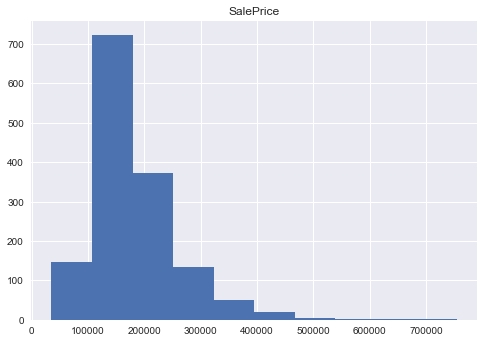

In [7]:
#Plotting the Sale Price
df_Y.hist()
plt.show()

Sale price is right skewed. Lets take log transformation to make it normal

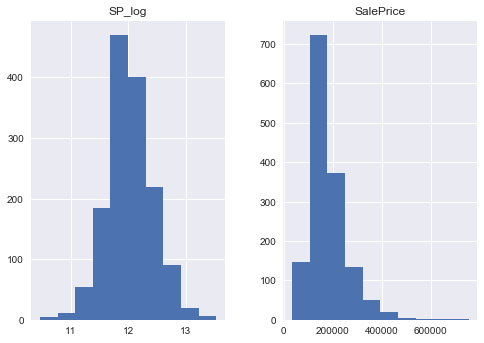

In [8]:
#Performing log operation makes the Sale price normal
df_Y['SP_log'] = np.log1p(df_all.SalePrice)
df_Y.hist()
plt.show()

Now the sale price is normally distributed

In [9]:
#Performing median imputation on the missing data

imputer =sk.preprocessing.Imputer(axis =0, strategy ="mean")
df_all_X_temp = pd.DataFrame(imputer.fit_transform(df_all_X))
df_all_X_temp.columns = df_all_X.columns
df_all_X_temp.index = df_all_X.index
df_all_X = df_all_X_temp
df_all_X

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0    65.000000   8450.0          7.0          5.0     2003.0   
1           20.0    80.000000   9600.0          6.0          8.0     1976.0   
2           60.0    68.000000  11250.0          7.0          5.0     2001.0   
3           70.0    60.000000   9550.0          7.0          5.0     1915.0   
4           60.0    84.000000  14260.0          8.0          5.0     2000.0   
5           50.0    85.000000  14115.0          5.0          5.0     1993.0   
6           20.0    75.000000  10084.0          8.0          5.0     2004.0   
7           60.0    70.049958  10382.0          7.0          6.0     1973.0   
8           50.0    51.000000   6120.0          7.0          5.0     1931.0   
9          190.0    50.000000   7420.0          5.0          6.0     1939.0   
10          20.0    70.000000  11200.0          5.0          5.0     1965.0   
11          60.0    85.000000  11924.0          9.0          5.0     2005.0   
12          20.0    70.049958  12968.0          5.0          6.0     1962.0   
13          20.0    91.000000  10652.0          7.0          5.0     2006.0   
14          20.0    70.049958  10920.0          6.0          5.0     1960.0   
15          45.0    51.000000   6120.0          7.0          8.0     1929.0   
16          20.0    70.049958  11241.0          6.0          7.0     1970.0   
17          90.0    72.000000  10791.0          4.0          5.0     1967.0   
18          20.0    66.000000  13695.0          5.0          5.0     2004.0   
19          20.0    70.000000   7560.0          5.0          6.0     1958.0   
20          60.0   101.000000  14215.0          8.0          5.0     2005.0   
21          45.0    57.000000   7449.0          7.0          7.0     1930.0   
22          20.0    75.000000   9742.0          8.0          5.0     2002.0   
23         120.0    44.000000   4224.0          5.0          7.0     1976.0   
24          20.0    70.049958   8246.0          5.0          8.0     1968.0   
25          20.0   110.000000  14230.0          8.0          5.0     2007.0   
26          20.0    60.000000   7200.0          5.0          7.0     1951.0   
27          20.0    98.000000  11478.0          8.0          5.0     2007.0   
28          20.0    47.000000  16321.0          5.0          6.0     1957.0   
29          30.0    60.000000   6324.0          4.0          6.0     1927.0   
...          ...          ...      ...          ...          ...        ...   
1430        60.0    60.000000  21930.0          5.0          5.0     2005.0   
1431       120.0    70.049958   4928.0          6.0          6.0     1976.0   
1432        30.0    60.000000  10800.0          4.0          6.0     1927.0   
1433        60.0    93.000000  10261.0          6.0          5.0     2000.0   
1434        20.0    80.000000  17400.0          5.0          5.0     1977.0   
1435        20.0    80.000000   8400.0          6.0          9.0     1962.0   
1436        20.0    60.000000   9000.0          4.0          6.0     1971.0   
1437        20.0    96.000000  12444.0          8.0          5.0     2008.0   
1438        20.0    90.000000   7407.0          6.0          7.0     1957.0   
1439        60.0    80.000000  11584.0          7.0          6.0     1979.0   
1440        70.0    79.000000  11526.0          6.0          7.0     1922.0   
1441       120.0    70.049958   4426.0          6.0          5.0     2004.0   
1442        60.0    85.000000  11003.0         10.0          5.0     2008.0   
1443        30.0    70.049958   8854.0          6.0          6.0     1916.0   
1444        20.0    63.000000   8500.0          7.0          5.0     2004.0   
1445        85.0    70.000000   8400.0          6.0          5.0     1966.0   
1446        20.0    70.049958  26142.0          5.0          7.0     1962.0   
1447        60.0    80.000000  10000.0          8.0          5.0     1995.0   
1448        50.0    70.000000  11767.0          4.0     

Performing some charts with explonatory and dependent variable

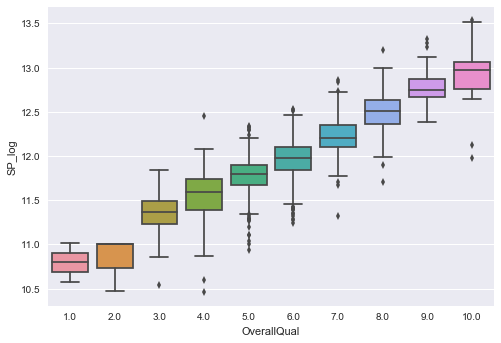

In [10]:
sns.boxplot(df_all_X.OverallQual, df_Y.SP_log)
plt.show()

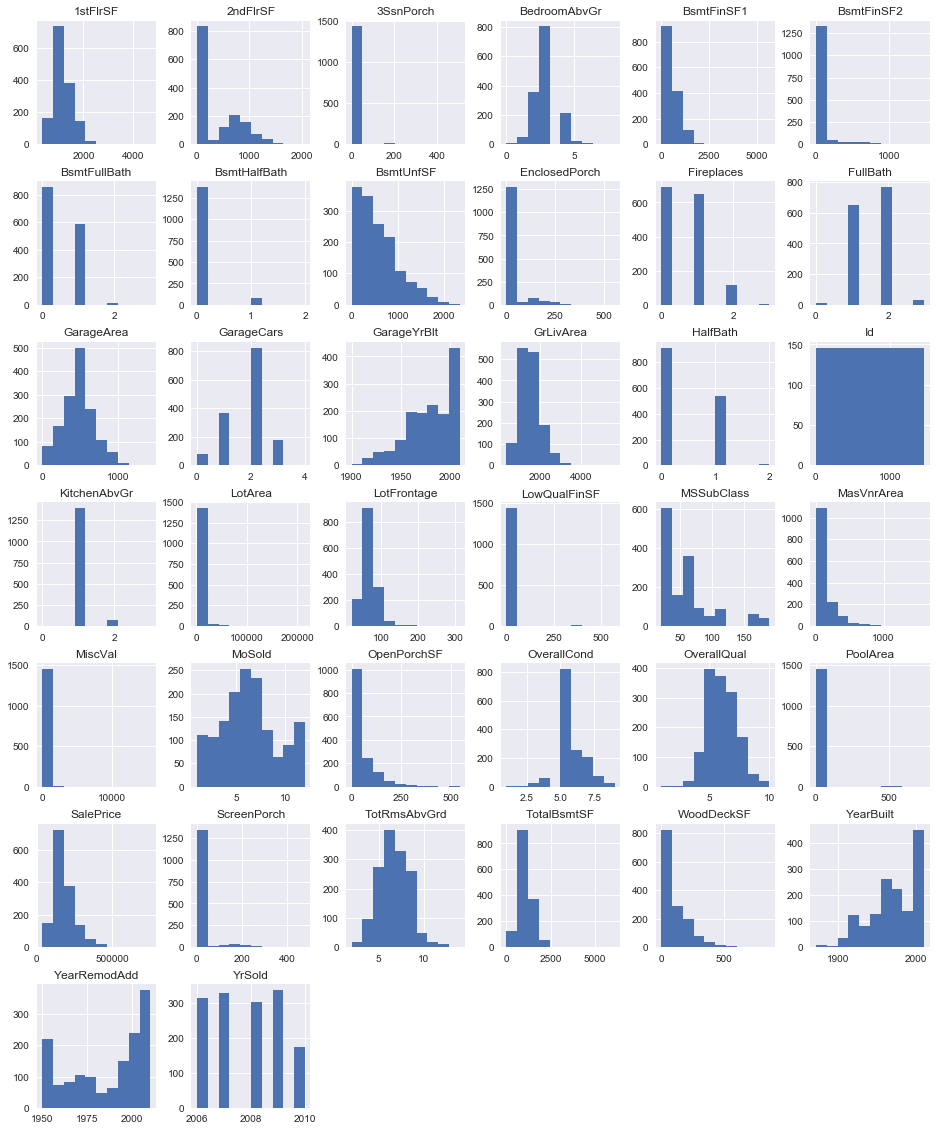

In [11]:
#Plot on all the X data from original dataset
df_num_log = df_num_clean.apply(lambda x: np.log1p(x))
df_num.hist(bins=10, figsize =(16,20))
plt.show()

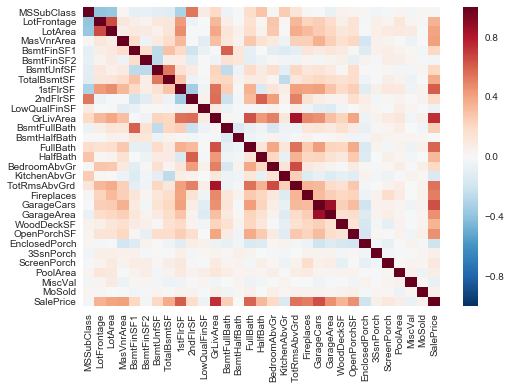

In [12]:
#Correlation plot
sns.heatmap(df_num_log.corr())
plt.show()

In [13]:
#Performing log operations on all columns
#Log on all data
df_all_X_log = df_all_X.apply(lambda x: np.log1p(x))
df_all_X_log

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
0       4.110874     4.189655   9.042040     2.079442     1.791759   7.602900   
1       3.044522     4.394449   9.169623     1.945910     2.197225   7.589336   
2       4.110874     4.234107   9.328212     2.079442     1.791759   7.601902   
3       4.262680     4.110874   9.164401     2.079442     1.791759   7.557995   
4       4.110874     4.442651   9.565284     2.197225     1.791759   7.601402   
5       3.931826     4.454347   9.555064     1.791759     1.791759   7.597898   
6       3.044522     4.330733   9.218804     2.197225     1.791759   7.603399   
7       4.110874     4.263383   9.247925     2.079442     1.945910   7.587817   
8       3.931826     3.951244   8.719481     2.079442     1.791759   7.566311   
9       5.252273     3.931826   8.912069     1.791759     1.945910   7.570443   
10      3.044522     4.262680   9.323758     1.791759     1.791759   7.583756   
11      4.110874     4.454347   9.386392     2.302585     1.791759   7.603898   
12      3.044522     4.263383   9.470317     1.791759     1.945910   7.582229   
13      3.044522     4.521789   9.273597     2.079442     1.791759   7.604396   
14      3.044522     4.263383   9.298443     1.945910     1.791759   7.581210   
15      3.828641     3.951244   8.719481     2.079442     2.197225   7.565275   
16      3.044522     4.263383   9.327412     1.945910     2.079442   7.586296   
17      4.510860     4.290459   9.286560     1.609438     1.791759   7.584773   
18      3.044522     4.204693   9.524859     1.791759     1.791759   7.603399   
19      3.044522     4.262680   8.930759     1.791759     1.945910   7.580189   
20      4.110874     4.624973   9.562123     2.197225     1.791759   7.603898   
21      3.828641     4.060443   8.915969     2.079442     2.079442   7.565793   
22      3.044522     4.330733   9.184304     2.197225     1.791759   7.602401   
23      4.795791     3.806662   8.348775     1.791759     2.079442   7.589336   
24      3.044522     4.263383   9.017605     1.791759     2.197225   7.585281   
25      3.044522     4.709530   9.563178     2.197225     1.791759   7.604894   
26      3.044522     4.110874   8.881975     1.791759     2.079442   7.576610   
27      3.044522     4.595120   9.348275     2.197225     1.791759   7.604894   
28      3.044522     3.871201   9.700269     1.791759     1.945910   7.579679   
29      3.433987     4.110874   8.752265     1.609438     1.945910   7.564238   
...          ...          ...        ...          ...          ...        ...   
1430    4.110874     4.110874   9.995656     1.791759     1.791759   7.603898   
1431    4.795791     4.263383   8.502891     1.945910     1.945910   7.589336   
1432    3.433987     4.110874   9.287394     1.609438     1.945910   7.564238   
1433    4.110874     4.543295   9.236203     1.945910     1.791759   7.601402   
1434    3.044522     4.394449   9.764283     1.791759     1.791759   7.589842   
1435    3.044522     4.394449   9.036106     1.945910     2.302585   7.582229   
1436    3.044522     4.110874   9.105091     1.609438     1.945910   7.586804   
1437    3.044522     4.574711   9.429074     2.197225     1.791759   7.605392   
1438    3.044522     4.510860   8.910316     1.945910     2.079442   7.579679   
1439    4.110874     4.394449   9.357466     2.079442     1.945910   7.590852   
1440    4.262680     4.382027   9.352447     1.945910     2.079442   7.561642   
1441    4.795791     4.263383   8.395477     1.945910     1.791759   7.603399   
1442    4.110874     4.454347   9.306014     2.397895     1.791759   7.605392   
1443    3.433987     4.263383   9.088738     1.945910     1.945910   7.558517   
1444    3.044522     4.158883   9.047939     2.079442     1.791759   7.603399   
1445    4.454347     4.262680   9.036106     1.945910     1.791759   7.584265   
1446    3.044522     4.263383  10.171337     1.791759     2.079442   7.582229   
1447    4.110874     4.394449   9.210

In [14]:

msk = np.random.rand(len(df_all_X_log)) <.8
msk
train_X = df_all_X_log[msk]
train_Y = df_Y[msk]

#Test
test_X = df_all_X_log[~msk]
test_Y = df_Y[~msk]

print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

1173
1173
287
287


In [15]:

rf_param = ensemble.RandomForestRegressor()
cols = list(train_X.columns.values)

model_rf = rf_param.fit(train_X[cols],train_Y.SP_log)

r2 = sk.metrics.r2_score(test_Y.SP_log, model_rf.predict(test_X[cols]))

mse = np.mean((test_Y.SP_log - model_rf.predict(test_X[cols]))**2)
rmse = sqrt(np.mean((test_Y.SP_log - model_rf.predict(test_X[cols]))**2))

#Seems very good value
print(r2)
print(mse)
print(rmse)


0.998235240208
0.0003109319400659745
0.017633262320568322


In [21]:
#test_df
test_df_all = pd.get_dummies(test_df)

test_df_all_X = test_df_all.loc[:,'MSSubClass':'SaleCondition_Partial']

#Missing columns correction
missing_cols = list(set(df_all_X.columns) - set(test_df_all_X.columns))
#test_df_all_X.columns

for col in missing_cols:
    test_df_all_X[col] = 3

#Imputer
imputer =sk.preprocessing.Imputer(axis =0, strategy ="mean")
test_df_temp = pd.DataFrame(imputer.fit_transform(test_df_all_X))
test_df_temp.columns = test_df_all_X.columns
test_df_temp.index = test_df_all_X.index


final_test_df = test_df_temp.apply(lambda x: np.log1p(x))
final_test_df


MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
0       3.044522     4.394449   9.360741     1.791759     1.945910   7.581720   
1       3.044522     4.406719   9.565775     1.945910     1.945910   7.580189   
2       4.110874     4.317488   9.534668     1.791759     1.791759   7.599902   
3       4.110874     4.369448   9.208238     1.945910     1.945910   7.600402   
4       4.795791     3.784190   8.518392     2.197225     1.791759   7.597396   
5       4.110874     4.330733   9.210440     1.945910     1.791759   7.597898   
6       3.044522     4.242482   8.984819     1.945910     2.079442   7.597396   
7       4.110874     4.158883   9.036344     1.945910     1.791759   7.600402   
8       3.044522     4.454347   9.227886     2.079442     1.791759   7.596392   
9       3.044522     4.262680   9.036106     1.609438     1.791759   7.586296   
10      4.795791     3.295837   8.675734     2.079442     1.791759   7.600902   
11      5.081404     3.091042   7.427144     1.945910     1.791759   7.586804   
12      5.081404     3.091042   7.427144     1.791759     1.791759   7.586804   
13      5.081404     3.218876   7.732369     1.945910     1.945910   7.588830   
14      4.795791     3.218876   7.732369     2.079442     1.945910   7.588830   
15      4.110874     4.634729   9.461799     2.302585     1.791759   7.605890   
16      3.044522     4.553877   9.463742     2.197225     1.791759   7.605890   
17      3.044522     4.510860   9.351927     2.302585     1.791759   7.603898   
18      3.044522     4.382027   9.555560     2.197225     1.791759   7.603898   
19      3.044522     4.709530   9.568085     2.302585     1.791759   7.602900   
20      4.110874     4.663439   9.521568     2.197225     1.791759   7.602401   
21      4.795791     3.737670   8.872487     2.197225     1.791759   7.604396   
22      3.044522     4.615121   9.825256     1.945910     1.791759   7.603898   
23      4.795791     3.784190   8.072155     2.079442     1.791759   7.604396   
24      4.394449     4.219508   9.495594     2.079442     1.791759   7.603399   
25      4.110874     4.158883   9.056956     2.079442     1.791759   7.603399   
26      4.110874     4.110874   9.766178     2.197225     1.791759   7.600402   
27      3.044522     4.304065   9.103646     2.197225     1.791759   7.603898   
28      3.044522     4.532599   9.128696     2.079442     1.791759   7.605890   
29      3.044522     4.442651   9.253496     1.945910     1.791759   7.603898   
...          ...          ...        ...          ...          ...        ...   
1429    3.433987     3.931826   8.858084     1.609438     1.945910   7.563201   
1430    3.931826     4.330733   9.111735     1.945910     1.791759   7.579679   
1431    3.433987     4.248495   9.422787     1.386294     1.791759   7.573531   
1432    5.252273     3.931826   9.105091     1.791759     1.945910   7.576610   
1433    3.931826     4.110874   9.050289     1.386294     1.791759   7.558517   
1434    4.795791     3.737670   8.656781     2.197225     1.791759   7.603898   
1435    4.795791     3.806662   8.254009     2.197225     1.791759   7.603399   
1436    3.044522     4.248495  10.068197     1.945910     1.945910   7.590852   
1437    4.510860     4.189655   9.034319     1.945910     1.791759   7.590347   
1438    3.044522     4.262680   9.117896     2.197225     1.791759   7.601902   
1439    4.394449     4.948760   9.312987     1.945910     1.945910   7.588830   
1440    3.044522     4.242482  10.821836     1.945910     1.791759   7.580189   
1441    3.044522     4.242482   8.999496     1.945910     1.791759   7.601402   
1442    3.044522     4.564348   9.519221     2.197225     1.791759   7.603898   
1443    3.044522     4.488636   9.356862     2.302585     1.791759   7.603898   
1444    3.044522     4.836282  10.349807     0.693147     1.386294   7.576610   
1445    4.510860     4.369448   8.856661     2.079442     1.791759   7.599902   
1446    5.081404     3.737670   7.888

In [22]:
cols = list(df_all_X.columns)
output_test_df = test_df
output_test_df['Predicted_SP'] = np.exp(model_rf.predict(final_test_df[cols]))
output_test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  2890          30       RM         50.0     7030   Pave   NaN      Reg   
1430  2891          50       RM         75.0     9060   Pave   NaN      Reg   
1431  2892          30  C (all)         69.0    12366   Pave   NaN      Reg   
1432  2893         190  C (all)         50.0     9000   Pave   NaN      Reg   
1433  2894          50  C (all)         60.0     8520   Grvl   NaN      Reg   
1434  2895         120       RM         41.0     5748   Pave   NaN      IR1   
1435  2896         120       RM         44.0     3842   Pave   NaN      IR1   
1436  2897          20       RL         69.0    23580   Pave   NaN      IR1   
1437  2898          90       RL         65.0     8385   Pave   NaN      Reg   
1438  2899          20       RL         70.0     9116   Pave   NaN      Reg   
1439  2900          80       RL        140.0    11080   Pave   NaN      Reg   
1440  2901          20       RL          NaN    50102   Pave   NaN      IR1   
1441  2902          20       RL          NaN     8098   Pave   NaN      IR1   
1442  2903          20       RL         95.0    13618   Pave   NaN      Reg   
1443  2904          20       RL         88.0    11577   Pave   NaN      Reg   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   
1445  2906          90       RM         78.0     7020   Pave   NaN      Reg   
1446  2907         160       RM         41.0     2665   Pave   NaN      Reg   
1447  2908          20       RL         58.0    10172   Pa

In this method we got a very good r2 and mse. But it does not predict the house sale price exactly. So it seems there is some sort of over-fitting in this second method. Concluding that the first method is good for prediction.

Now lets reduce the explonatory variables and try to predict the sale price via <a href="https://www.youtube.com/channel/UCz2-0uvBJt-AwoiFSyMb_yQ"> amazon echo(alexa)</a>

Video of alexa house price prediction can be found in below link
<a> https://goo.gl/photos/fwU6avBCXBTmHTsT9</a>
    <iframe src="https://goo.gl/photos/fwU6avBCXBTmHTsT9" > </iframe>